In [1]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# add the parent dir of notebooks to path
sys.path.append(os.path.dirname(os.path.abspath('')))

OUTPUT_DIRECTORY = os.path.join(os.path.abspath(''), "06_Relabelling_output")
os.makedirs(OUTPUT_DIRECTORY, exist_ok=True)

# Dataset Re-labelling


We want to use TRAINSET to relabel anomailes https://trainset.geocene.com/

Needs data in a specific format

In [2]:
from data.nab.real_tweets import nab_multivariate_tweet_volume, STOCK_NAMES
NAB_FOLDER = os.path.abspath(os.path.join(os.path.abspath(''), os.pardir, "nab", "data", "realTweets"))
tweet_df = nab_multivariate_tweet_volume(labels="points")

In [3]:
for stock in STOCK_NAMES:
    path = os.path.join(NAB_FOLDER, f"Twitter_volume_{stock}.csv")
    df = pd.read_csv(path)
    df["filename"] = stock
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df = df.set_index("timestamp", drop=False)
    df["label"] = tweet_df[f"anomaly_{stock}"].apply(int)
    df.index = df.index.tz_localize(tz='UTC')
    df["timestamp"] = df.index.to_series().apply(lambda x: x.isoformat())
    df = df.set_index(["filename", "timestamp"])
    df.to_csv(os.path.join(OUTPUT_DIRECTORY, f"trainset_{stock}.csv"))

The data was then relabelled with TRAINSET.

Now, lets visualise the data again

In [4]:
from data.nab.relabelled_tweets import nab_tweets_relabelled, STOCK_NAMES

relabelled_tweets = nab_tweets_relabelled()


def plot_time_series_nab_tweets(dat, anomaly_alpha=0.2, extra_label=""):
    plt.ion()
    fig, axes = plt.subplots(len(STOCK_NAMES), 1, figsize=(15, 3*len(STOCK_NAMES)), dpi=160)

    def color_map(value):
        if value is True:
            return (1,0,0)
        else:
            return (0,0,1)

    for i, stock in enumerate(STOCK_NAMES):
        ax = axes[i]
        ax.title.set_text(stock)
        ax.scatter(dat.index, dat[f"value_{stock}"], c=dat[f"anomaly_{stock}"].apply(color_map), s=1, marker=",")
        ax.fill_between(dat.index, 0, 1, where=dat[f"anomaly_{stock}"], color="red", alpha=anomaly_alpha, transform=ax.get_xaxis_transform())
        ax.set_xticks([])
        ax.set_ylabel("No. of tweets")
        ax.set_xlabel("Timestep")
    
    fig.tight_layout()
    plt.draw()
    plt.savefig(f"{OUTPUT_DIRECTORY}/nab_tweets{extra_label}.png")

In [5]:
relabelled_tweets.index

DatetimeIndex(['2015-02-26 21:42:53', '2015-02-26 21:47:53',
               '2015-02-26 21:52:53', '2015-02-26 21:57:53',
               '2015-02-26 22:02:53', '2015-02-26 22:07:53',
               '2015-02-26 22:12:53', '2015-02-26 22:17:53',
               '2015-02-26 22:22:53', '2015-02-26 22:27:53',
               ...
               '2015-04-23 03:02:53', '2015-04-23 03:07:53',
               '2015-04-23 03:12:53', '2015-04-23 03:17:53',
               '2015-04-23 03:22:53', '2015-04-23 03:27:53',
               '2015-04-23 03:32:53', '2015-04-23 03:37:53',
               '2015-04-23 03:42:53', '2015-04-23 03:47:53'],
              dtype='datetime64[ns]', name='timestamp', length=15902, freq=None)

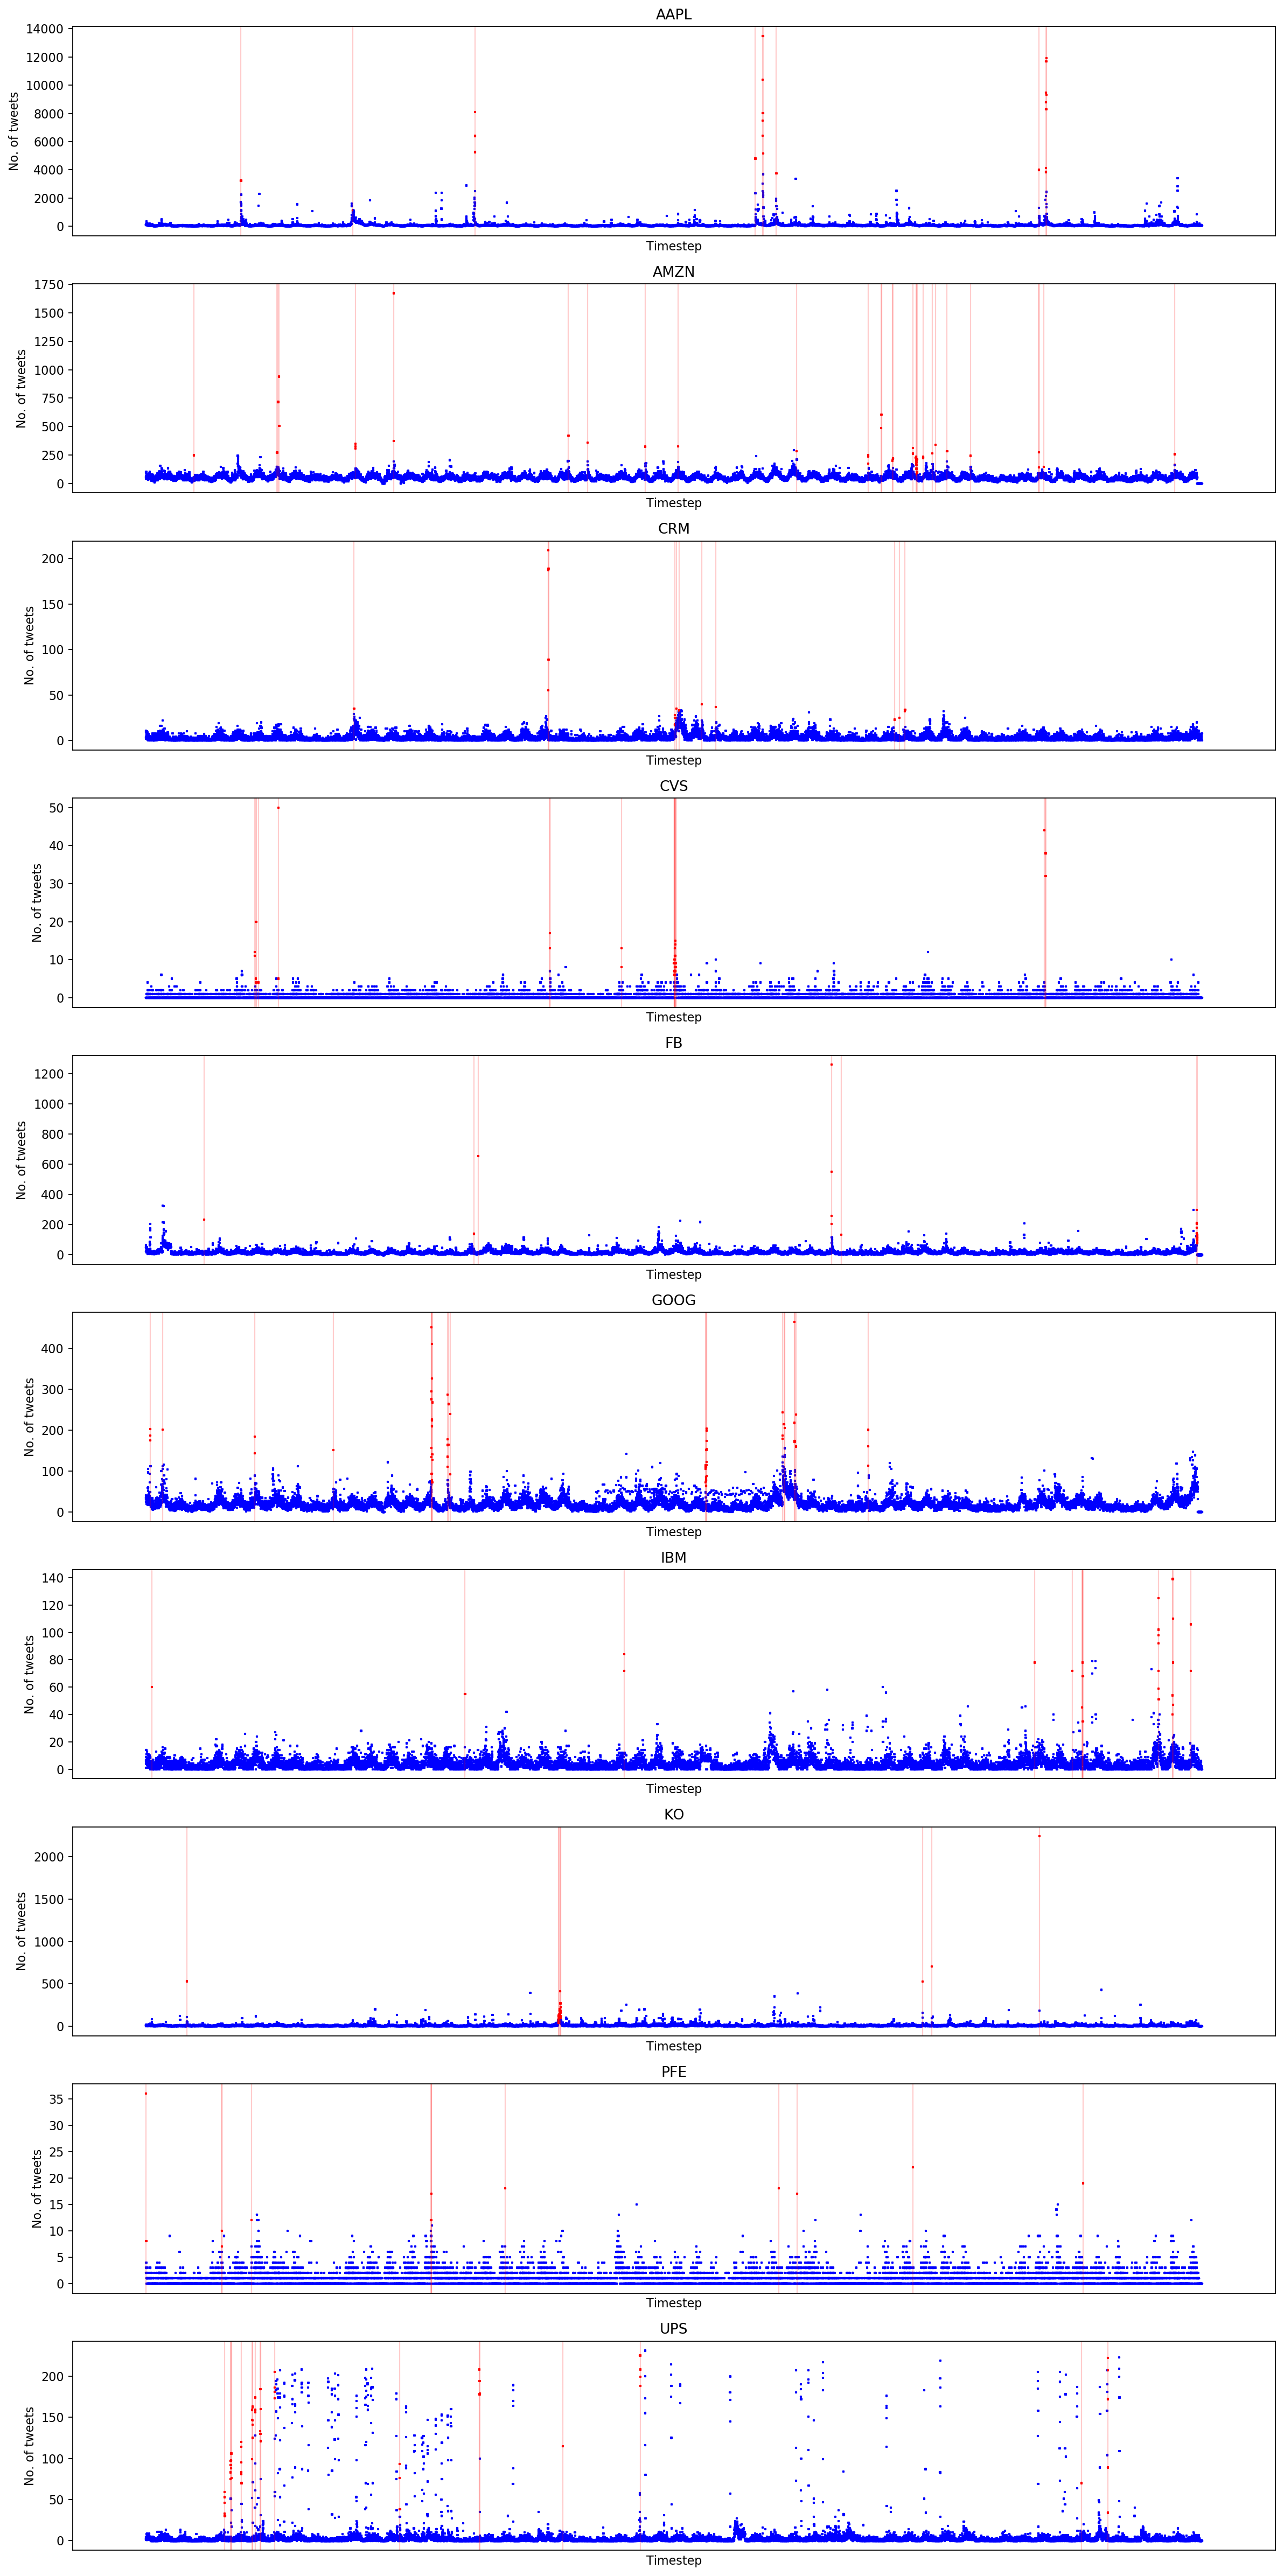

In [6]:
plot_time_series_nab_tweets(relabelled_tweets)

In [7]:
from evaluation.utils import upsample

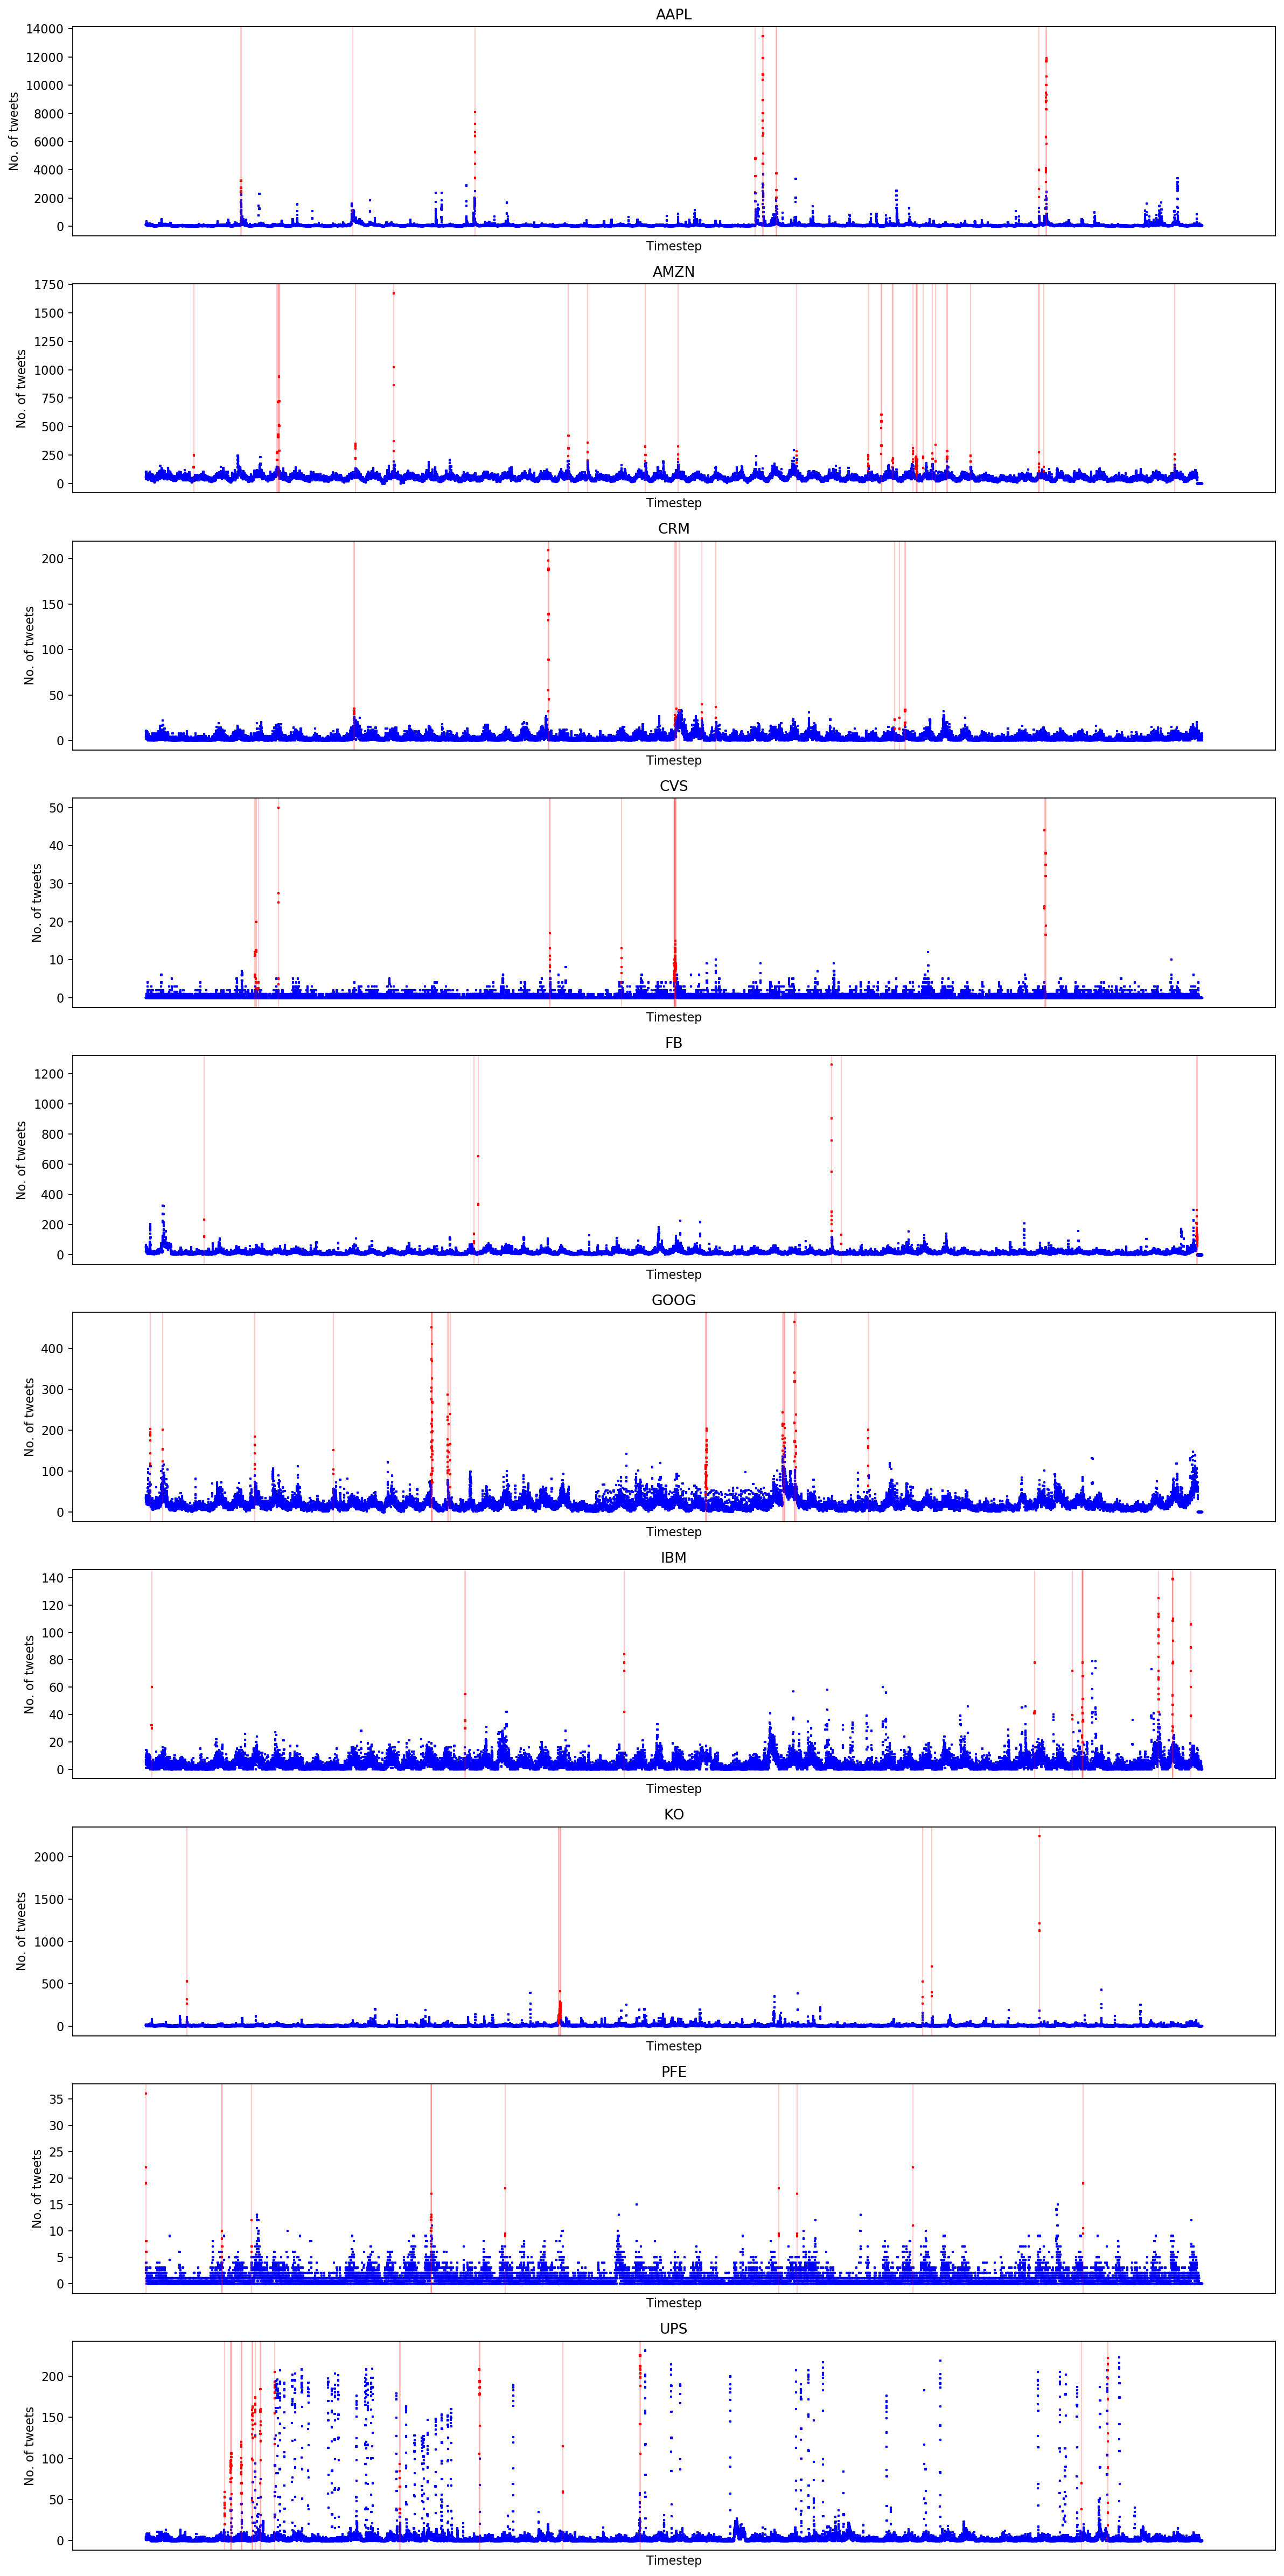

In [8]:
plot_time_series_nab_tweets(upsample(relabelled_tweets, "2T30S"))